In [2]:
#region imports
from IPython import get_ipython

# noinspection PyBroadException
try:
    _magic = get_ipython().run_line_magic
    _magic("load_ext", "autoreload")
    _magic("autoreload", "2")
except:
    pass

# noinspection PyUnresolvedReferences
import datetime as dt
# noinspection PyUnresolvedReferences
import glob
# noinspection PyUnresolvedReferences
import os
# noinspection PyUnresolvedReferences
import pprint
# noinspection PyUnresolvedReferences
import sys
# noinspection PyUnresolvedReferences
import cartopy as crt
# noinspection PyUnresolvedReferences
import matplotlib as mpl
# noinspection PyUnresolvedReferences
import matplotlib.colors
# noinspection PyUnresolvedReferences
import matplotlib.pyplot as plt
# noinspection PyUnresolvedReferences
import numpy as np
# noinspection PyUnresolvedReferences
import pandas as pd
# noinspection PyUnresolvedReferences
import seaborn as sns
# noinspection PyUnresolvedReferences
import xarray as xr
# noinspection PyUnresolvedReferences
#import bnn_tools.bnn_array

import mod.funs as fu

plt.style.use('default')
xr.set_options(
    display_expand_data = False,
    display_expand_data_vars = True,
    display_max_rows = 10,
    display_style = 'html',
    display_width = 80,
    display_expand_attrs = False
);
#endregion

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
d37 = xr.open_dataset('../../data/d1/j37.nc')

In [4]:
N = '$N_{2.5-5\mathrm{nm}}$'
d5 = (
    xr.open_dataset('../../data/d1/ds_5.nc')
    .rename({'N':N})
)

In [5]:
d5

<xarray.Dataset>
Dimensions:                 (id: 3, Dp: 52, day: 1826, hour: 289, Dp_interval: 1)
Coordinates: (10/11)
  * Dp                      (Dp) float64 2.818e-09 3.162e-09 ... 8.913e-07 1e-06
  * id                      (id) object 'nais' 'dmps' 'nd'
  * hour                    (hour) float64 -24.0 -23.75 -23.5 ... 47.75 48.0
  * day                     (day) datetime64[ns] 2018-01-01 ... 2022-12-31
    is_day                  (hour) bool ...
    ...                      ...
    n_day                   (Dp_interval, day) int64 ...
    n_night                 (Dp_interval, day) int64 ...
    g                       (Dp_interval, day) object ...
    q                       (Dp_interval, day) float64 ...
    qCut                    (Dp_interval, day) object ...
Dimensions without coordinates: Dp_interval
Data variables:
    dndlDp                  (id, Dp, day, hour, Dp_interval) float64 ...
    $N_{2.5-5\mathrm{nm}}$  (Dp_interval, day, hour) float64 ...
    lN                      (Dp_interval, day, hour) float64 ...
    lN_s                    (Dp_interval, day, hour) float64 ...
    N_s                     (Dp_interval, day, hour) float64 ...
    max_lN                  (Dp_interval, day) float64 ...
    min_lN                  (Dp_interval, day) float64 ...
    d_lN                    (Dp_interval, day) float64 ...

In [9]:
ser = (
    xr.merge([
        d37['j37']
        .rolling({'hour':5},min_periods=1).mean()
        .max('hour'),
        d5['d_lN']
    ])
    .squeeze()
    .assign({'dN':lambda d:10**d['d_lN']})
    .assign({'dNr':lambda d:(d['d_lN']*2).round()/2})
    .assign({'lj37':lambda d:np.log10(d['j37'])})
    .to_dataframe()
    .where(lambda d:d['dN']>0)
    .where(lambda d:d['j37']>0)
)

/Users/aliaga/py-packs/xarray_exc/xarray/xarray/core/computation.py:760: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


In [10]:
ser

,j37,n_day,n_night,g,q,qCut,d_lN,dN,dNr,lj37
day,,,,,,,,,,
2018-01-01,0.006237,47.0,24.0,g1,0.566394,"(0.0, 5.0]",0.549701,3.545689,0.5,-2.205047
2018-01-02,0.124985,47.0,31.0,g1,70.673379,"(70.0, 75.0]",2.420983,263.622528,2.5,-0.903142
2018-01-03,0.011801,47.0,31.0,g1,16.488357,"(15.0, 20.0]",1.713744,51.730214,1.5,-1.928073
2018-01-04,0.008374,47.0,31.0,g1,2.580239,"(0.0, 5.0]",1.093178,12.393032,1.0,-2.077047
2018-01-05,0.005418,47.0,31.0,g1,53.429830,"(50.0, 55.0]",2.193724,156.215409,2.0,-2.266142
...,...,...,...,...,...,...,...,...,...,...
2022-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-12-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-12-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


0

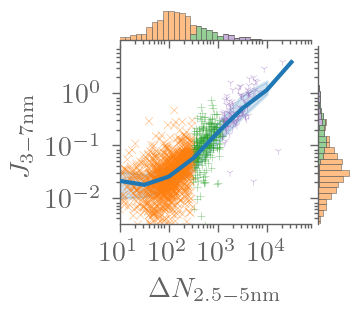

In [11]:
#region sciplot
# noinspection PyUnresolvedReferences
import scienceplots
plt.style.use([
    'default',
    'acp',
    #'notebook',
    # 'sp-grid',
    'no-black',
    'illustrator-safe'
])
#endregion sciplot
# sns.jointplot(
#     data=ser,
#     x = 'lj37',
#     y='d_lN',
#     # hue='g',
#     # style='g',
#     marker="+",
#     # scatter=False,
#     kind='reg',
#     # joint_kws={'scatter_kws':dict(
#     #     fc = 'none',
#     #     ec='C0',
#     #     alpha=.2,
#     #     # hue='g',
#     # )}
#     marginal_kws = dict(
#         multiple = 'stack',
#         # bw_adjust=1
#     )
# )


g = sns.JointGrid()


# f, ax = plt.subplots()
# f:plt.Figure
# ax: plt.Axes

f:plt.Figure = plt.gcf()
ax:plt.Axes = g.ax_joint
# sns.regplot(
#     scatter = False,
#     data=ser,
#     y = 'lj37',
#     x='d_lN',
#     # robust = True,
#     # ci=99,
#     color = 'C0',
#     # fit_reg=True,
#     lowess = True,
#     # x_ci=.99,
#     # marker = '.'
#     ax =ax,
#     line_kws = dict(lw=1.5)
#     )


sns.lineplot(

    # scatter = False,
    data=ser,
    y = 'lj37',
    x='dNr',
    # robust = True,
    # ci=99,
    color = 'C0',
    # fit_reg=True,
    # lowess = True,
    # x_ci=.99,
    # marker = '.'
    ax =ax,
    lw=1.5,
    estimator = 'median',
    errorbar = ('pi',50),
    zorder = 100

)

sns.scatterplot(
    # scatter = False,
    data=ser.where(lambda d:d['g']!=''),
    y = 'lj37',
    x='d_lN',
    # robust = True,
    # ci=99,
    # color = '.7',
    # x_ci=.99,
    markers = ['x','+','1'],
    hue = 'g',
    style = 'g',
    # style_order = ['+','+','.']
    alpha = .5,
    palette = ['C1','C2','C4'],
    legend=False,
    s = 8,
    ax =ax,
    rasterized=True

)


axx = g.ax_marg_x
axy  = g.ax_marg_y
sns.histplot(
    # scatter = False,
    data=ser.where(lambda d:d['g']!=''),
    # y = 'lj37',
    x='d_lN',
    # robust = True,
    # ci=99,
    # color = '.7',
    # x_ci=.99,
    # markers = ['x','+','1'],
    hue = 'g',
    # style = 'g',
    # style_order = ['+','+','.']
    alpha = .5,
    palette = ['C1','C2','C4'],
    legend=False,
    # size = .5,
    ax =axx,
    multiple = 'stack',
    lw=.2
)



sns.histplot(
    # scatter = False,
    data=ser.where(lambda d:d['g']!=''),
    y = 'lj37',
    # x='d_lN',
    # robust = True,
    # ci=99,
    # color = '.7',
    # x_ci=.99,
    # markers = ['x','+','1'],
    hue = 'g',
    # style = 'g',
    # style_order = ['+','+','.']
    alpha = .5,
    palette = ['C1','C2','C4'],
    legend=False,
    # size = .5,
    ax =axy,
    multiple = 'stack',
    lw=.2
)

# ax:plt.Axes = plt.gca()
# ax.set_yscale('log')
# ax.set_xscale('log')
ax.set_xlim(1,4.5)


l = [1, 2, 3, 4]
ax.set_xticks(l)
ax.set_xticklabels([f'$10^{l_}$' for l_ in l])

ii = [i for i in range(2,9)]
lll = []
for i_ in ii:
    for l_ in l:
        lll.append(np.log10(i_ * 10**l_))

ax.set_xticks(lll,minor=True)


l = range(-3,1)
ax.set_yticks(l)
ax.set_yticklabels([f'$10^{{{l_}}}$' for l_ in l])

ii = [i for i in range(2,9)]
lll = []
for i_ in ii:
    for l_ in l:
        lll.append(np.log10(i_ * 10**l_))

ax.set_yticks(lll,minor=True)

ax.set_ylim(-2.5,.9)


ax.set_xlabel('$\Delta N_{2.5-5\mathrm{nm}}$')
ax.set_ylabel('$J_{3-7\mathrm{nm}}$')


# Set the log formatter for the x-axis

f:plt.Figure = plt.gcf()
f.set_size_inches(1.5*1.2,1.3*1.2)

import uscit
# uscit.set_fig_rule(f)
uscit.set_margin(f,x1=.6,y1=.45)
#region temp open fig
_p_ = 'f30.pdf';plt.gcf().savefig(_p_,transparent=True,dpi=600);
os.system(f'open {_p_}')
# endregion temp open fig


<AxesSubplot: >